In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC


In [2]:
df = pd.read_csv('/content/breast-cancer.csv')

In [4]:
# Drop ID column and encode diagnosis
df.drop(columns=['id'], inplace=True) # Changed 'Unique ID' to 'id'
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [5]:
# Split features and labels
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [10]:
# Train SVM with linear kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_pca, y)


SVC(C=1, kernel='linear')

In [11]:
# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_pca, y)


SVC(C=1)

In [12]:
# Function to plot decision boundaries
def plot_decision_boundary(clf, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title(title)
    plt.show()


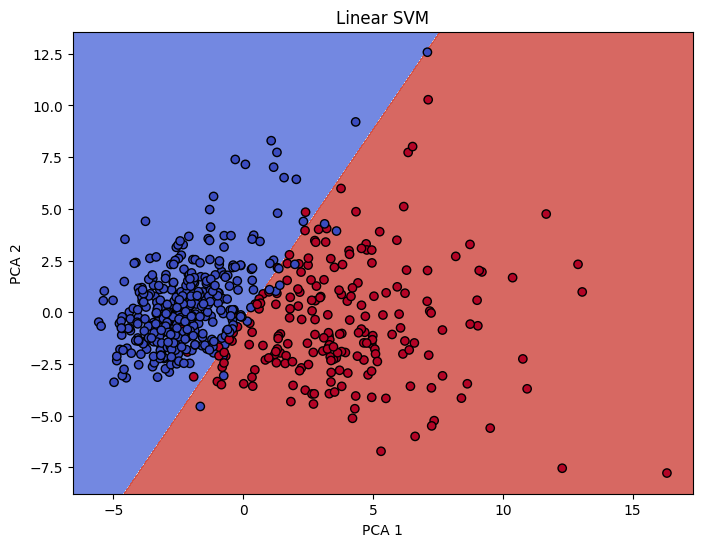

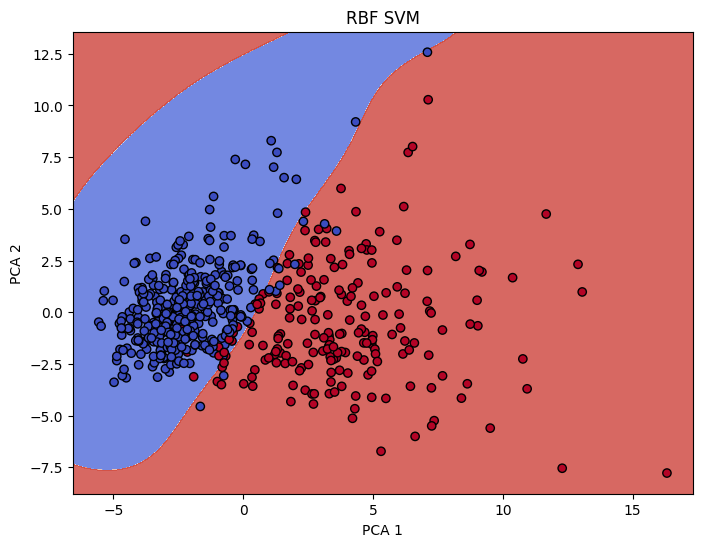

In [13]:
# Plot decision boundaries
plot_decision_boundary(svm_linear, X_pca, y, "Linear SVM")
plot_decision_boundary(svm_rbf, X_pca, y, "RBF SVM")

In [14]:
# Hyperparameter tuning for RBF SVM
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1]
}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid.fit(X_scaled, y)

# Print best parameters
print("Best Parameters:", grid.best_params_)

# Cross-validation score
cv_scores = cross_val_score(grid.best_estimator_, X_scaled, y, cv=5)
print("Cross-validation Accuracy:", cv_scores.mean())

Best Parameters: {'C': 10, 'gamma': 0.01}
Cross-validation Accuracy: 0.9789318428815401
